# Predicting California Housing Prices

## Introduction:

This project focuses on predicting median house values in California using data from the 1990 census. The primary objective is to develop a robust linear regression model that captures the relationships between various features and median house values. The project involves comprehensive exploratory data analysis (EDA), feature engineering, and model building using Python and popular data science libraries.

### Technologies Used:
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn
- Jupyter Notebooks

### Key Objectives:
1. Explore and clean the dataset from the 1990 California census.
2. Conduct Exploratory Data Analysis (EDA) to gain insights into housing characteristics.
3. Perform feature engineering to enhance the model's predictive power.
4. Build and evaluate a linear regression model to predict median house values.

The project is structured to provide a step-by-step walkthrough of the data analysis process, from data cleaning to model evaluation.



# Data Loading

In [25]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv(r"D:\GL\Python\housing.csv")

# Display the first few rows to get a glimpse
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Cleaning

In [26]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
# Handle missing values in the 'total_bedrooms' column by filling with the median
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

In [29]:
# Recheck the 'total_bedrooms' column for any remaining missing values
df["total_bedrooms"].isnull().sum()

0

In [30]:
# Display information about the dataset after handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Encoding Categorical Column 'ocean_proximity'

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the 'ocean_proximity' column
ocean_proximity_encoded = encoder.fit_transform(df[['ocean_proximity']])


ocean_proximity_encoded_df = pd.DataFrame(ocean_proximity_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, ocean_proximity_encoded_df], axis=1)

# Droping the original 'ocean_proximity' column
df.drop('ocean_proximity', axis=1, inplace=True)




In [43]:
#checking
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


# 🧙🏾‍♂️ Onward to Exploratory Data Analysis (EDA)!

In [31]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

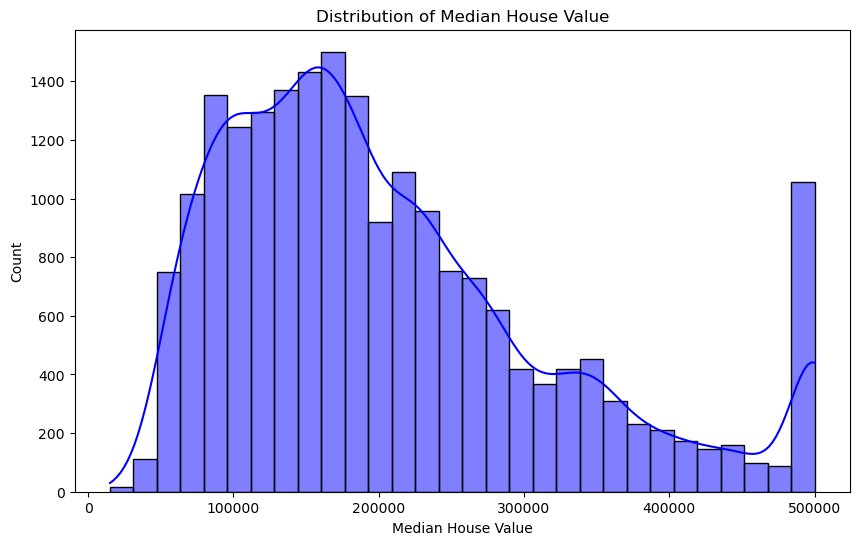

In [44]:
# Visualizing the distribution of the target variable 'median_house_value'
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=30, kde=True, color='blue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.show()

Insights:
    The distribution of median house values is right-skewed, with a peak around 200,000. Most houses fall within the 100,000 to 300,000 range, but there are potential outliers beyond 500,000. Context and careful consideration of extreme values are essential for accurate analysis.

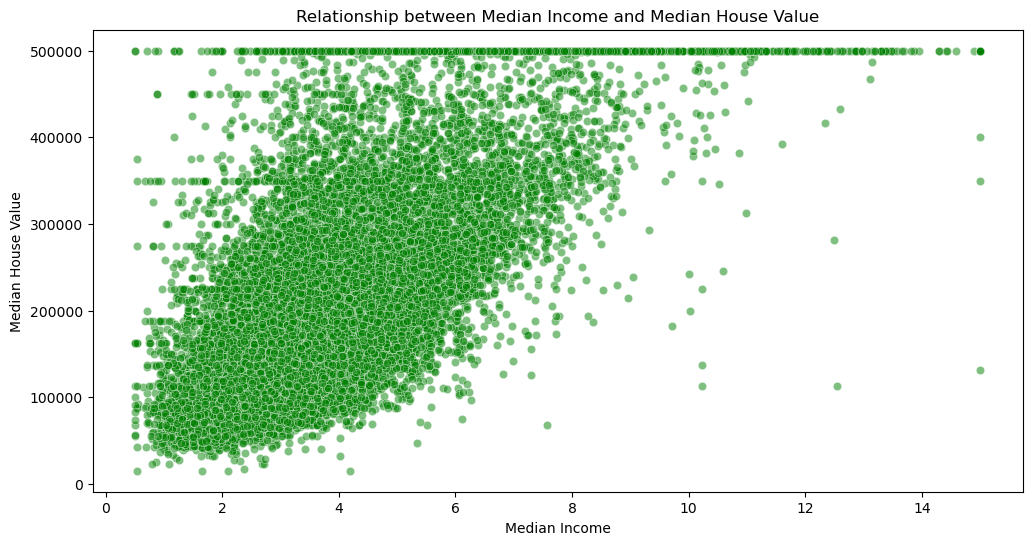

In [45]:
# Visualizing the relationship between 'median_income' and 'median_house_value'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5, color='green')
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Insights:
     Positive correlation between income and house value, moderately strong yet non-linear. Sparse points hint at outliers, and variability within income levels suggests additional factors influencing prices. Consider regional context for a comprehensive understanding.



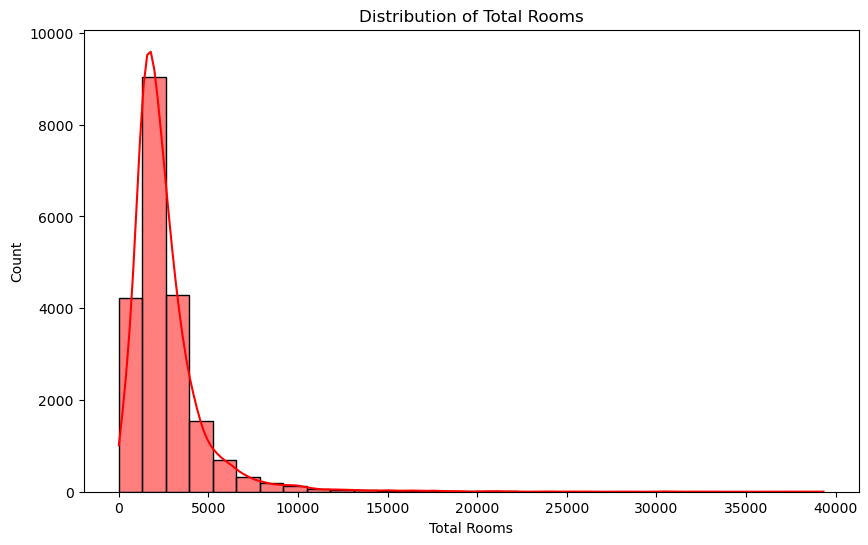

In [46]:
# Explore the distribution of 'total_rooms'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_rooms'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Rooms')
plt.xlabel('Total Rooms')
plt.show()

Insights:
    The distribution is multimodal and right-skewed, indicating diverse housing types. Primary peak around 5000 rooms with secondary peaks at 10,000 and 15,000. Extreme values above 30,000 suggest potential outliers.

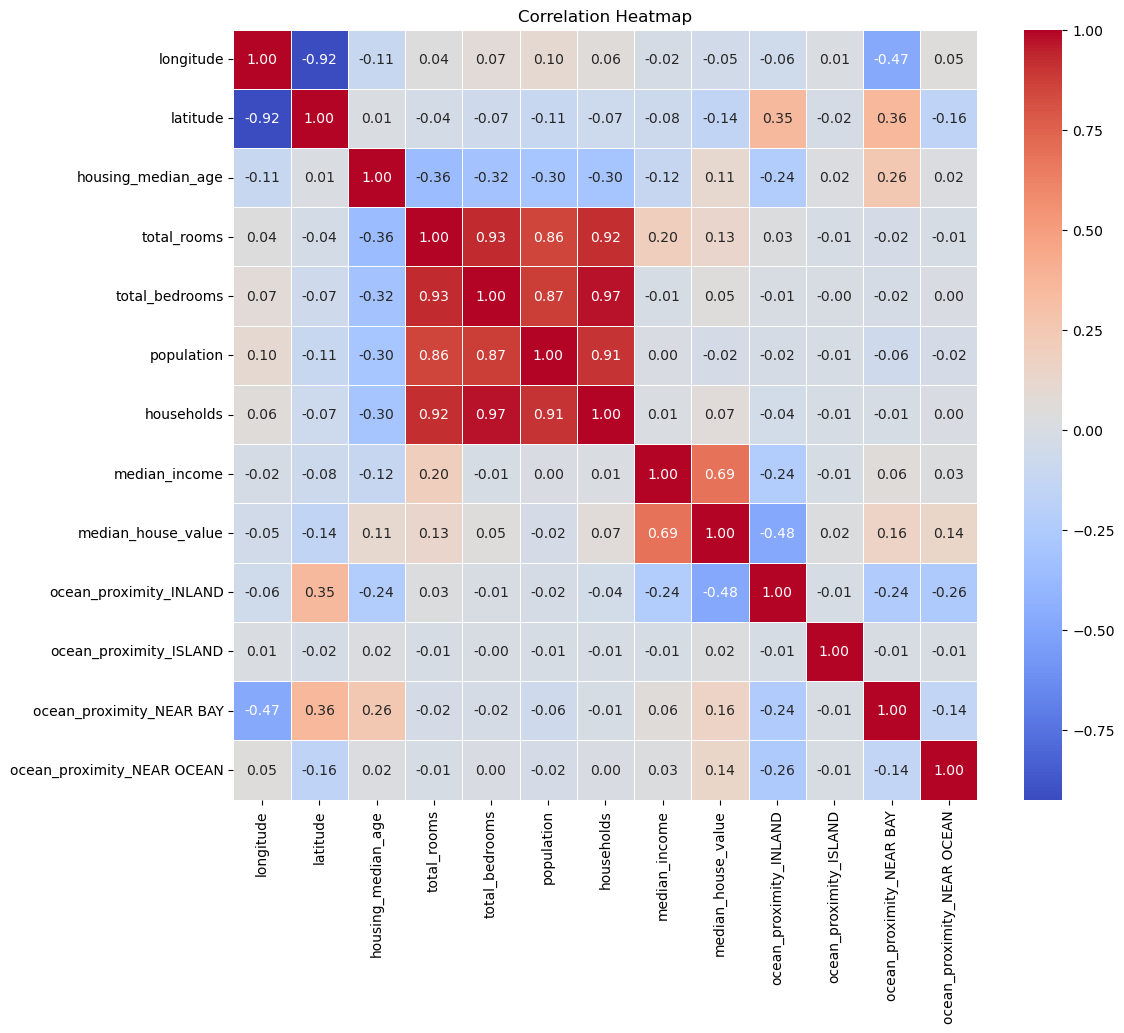

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[df.columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Insights:
Clustering of strong correlations: The heatmap shows a cluster of strong positive correlations among variables related to housing size, population, and income, suggesting interconnectedness among these factors.

Weaker correlations with housing median age: Housing median age has weaker correlations with other variables, suggesting it might be less influential in determining house prices.

<Figure size 640x480 with 0 Axes>

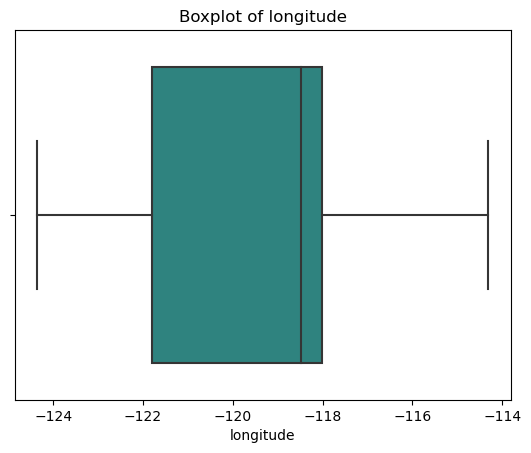

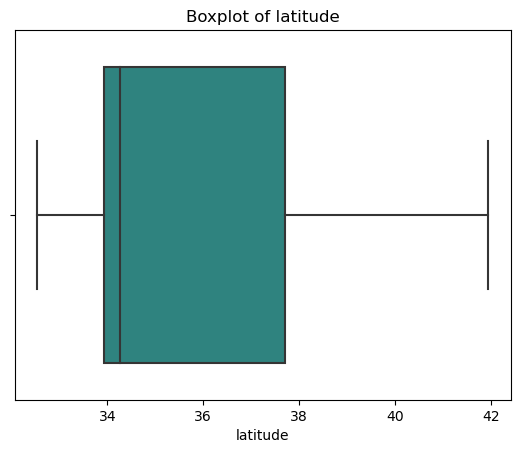

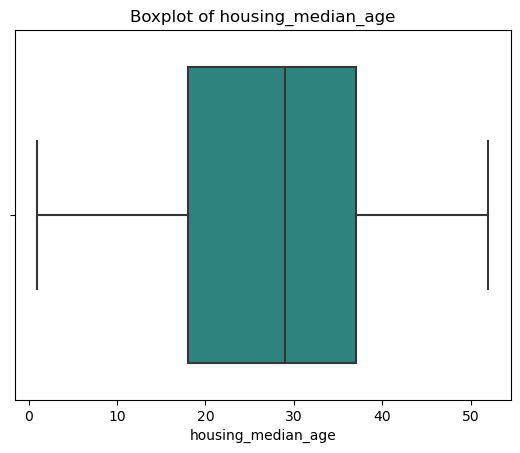

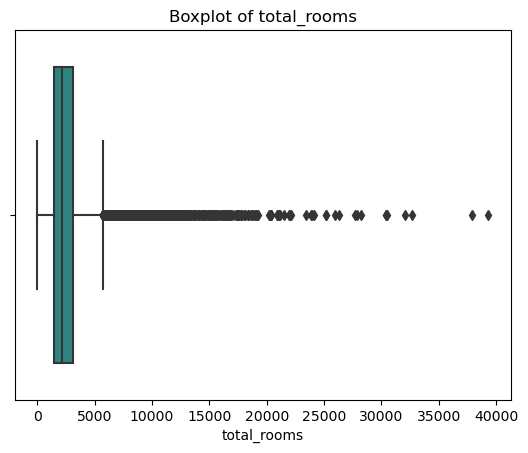

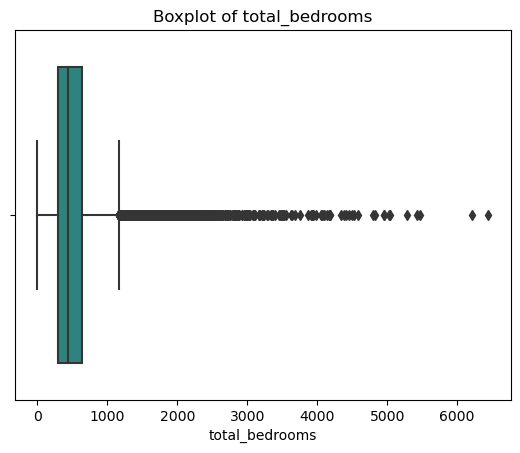

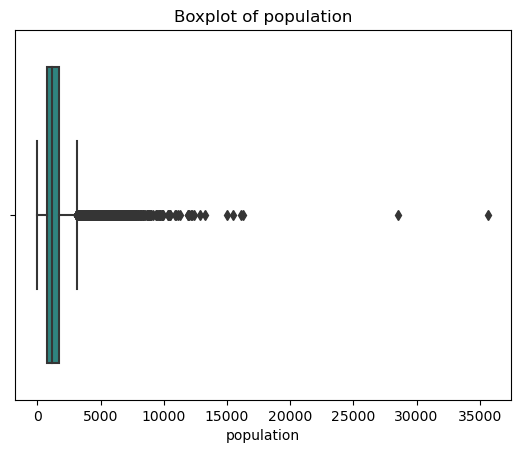

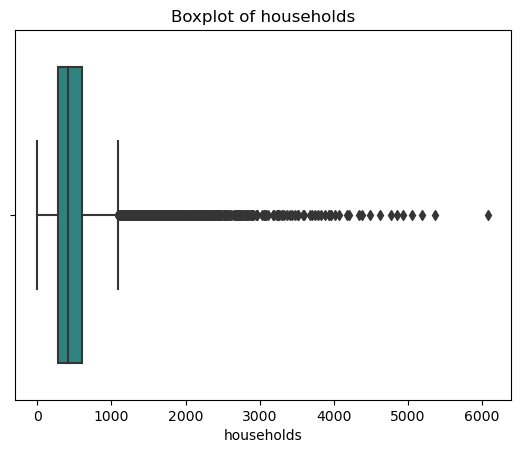

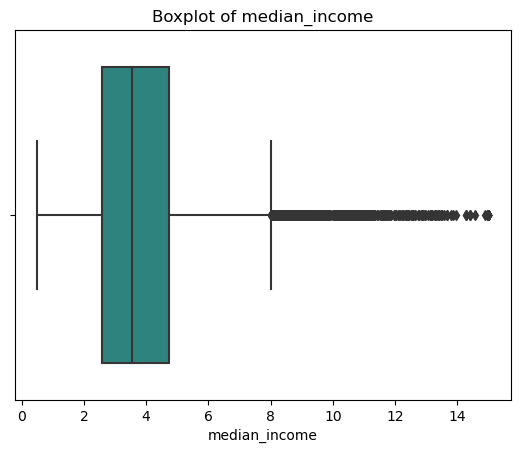

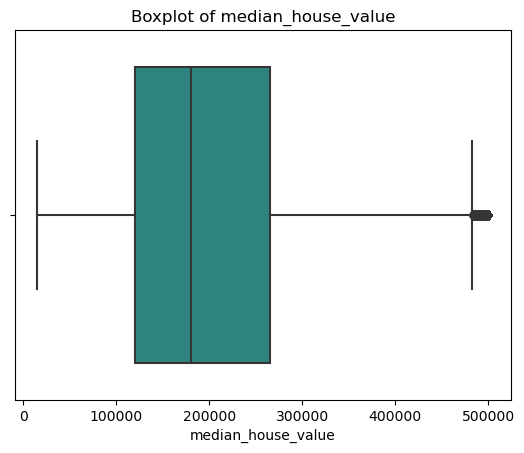

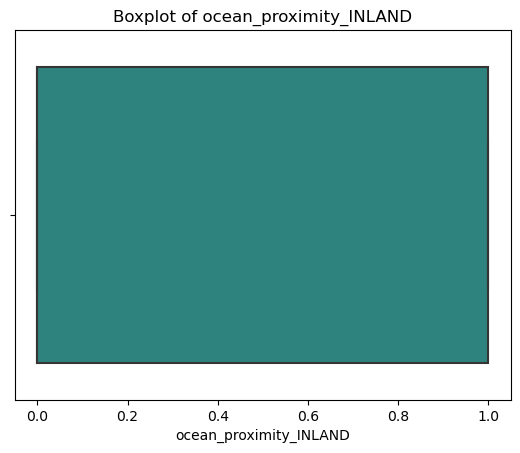

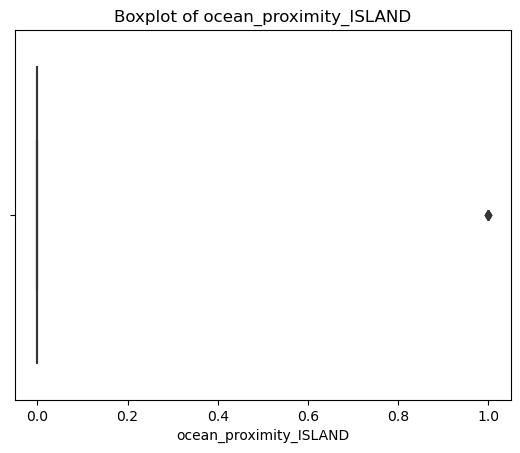

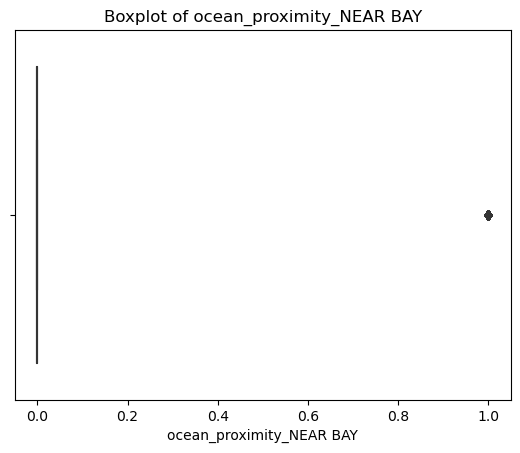

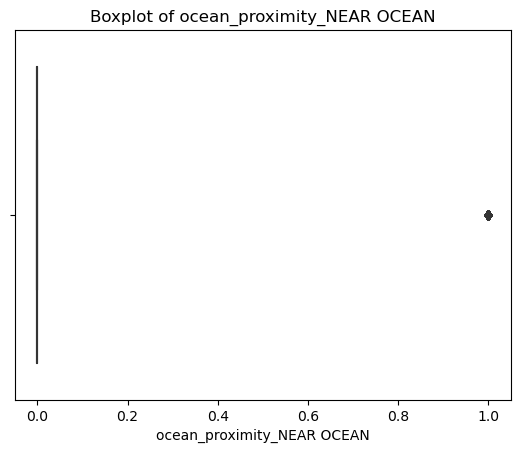

In [56]:
# Boxplots for all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure()
for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [57]:
# Identify and treat outliers in 'total_rooms'
Q1_rooms = df['total_rooms'].quantile(0.25)
Q3_rooms = df['total_rooms'].quantile(0.75)
IQR_rooms = Q3_rooms - Q1_rooms
upper_bound_rooms = Q3_rooms + 1.5 * IQR_rooms

df['total_rooms'] = np.where(df['total_rooms'] > upper_bound_rooms, upper_bound_rooms, df['total_rooms'])

# Identify and treat outliers in 'total_bedrooms'
Q1_bedrooms = df['total_bedrooms'].quantile(0.25)
Q3_bedrooms = df['total_bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

df['total_bedrooms'] = np.where(df['total_bedrooms'] > upper_bound_bedrooms, upper_bound_bedrooms, df['total_bedrooms'])

# Identify and treat outliers in 'population'
Q1_population = df['population'].quantile(0.25)
Q3_population = df['population'].quantile(0.75)
IQR_population = Q3_population - Q1_population
upper_bound_population = Q3_population + 1.5 * IQR_population

df['population'] = np.where(df['population'] > upper_bound_population, upper_bound_population, df['population'])

# Identify and treat outliers in 'households'
Q1_households = df['households'].quantile(0.25)
Q3_households = df['households'].quantile(0.75)
IQR_households = Q3_households - Q1_households
upper_bound_households = Q3_households + 1.5 * IQR_households

df['households'] = np.where(df['households'] > upper_bound_households, upper_bound_households, df['households'])

# Identify and treat outliers in 'median_income'
Q1_income = df['median_income'].quantile(0.25)
Q3_income = df['median_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
upper_bound_income = Q3_income + 1.5 * IQR_income

df['median_income'] = np.where(df['median_income'] > upper_bound_income, upper_bound_income, df['median_income'])

# Identify and treat outliers in 'median_house_value'
Q1_house_value = df['median_house_value'].quantile(0.25)
Q3_house_value = df['median_house_value'].quantile(0.75)
IQR_house_value = Q3_house_value - Q1_house_value
upper_bound_house_value = Q3_house_value + 1.5 * IQR_house_value

df['median_house_value'] = np.where(df['median_house_value'] > upper_bound_house_value, upper_bound_house_value, df['median_house_value'])


<Figure size 640x480 with 0 Axes>

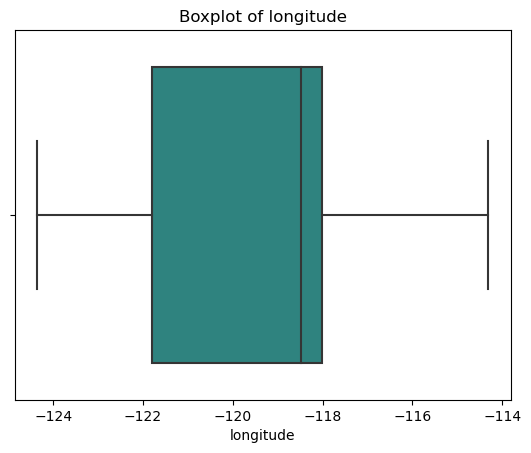

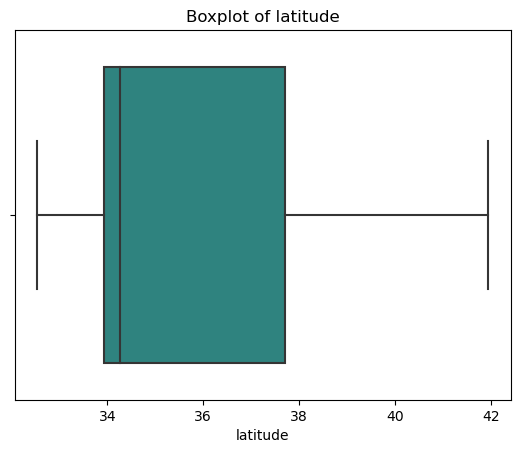

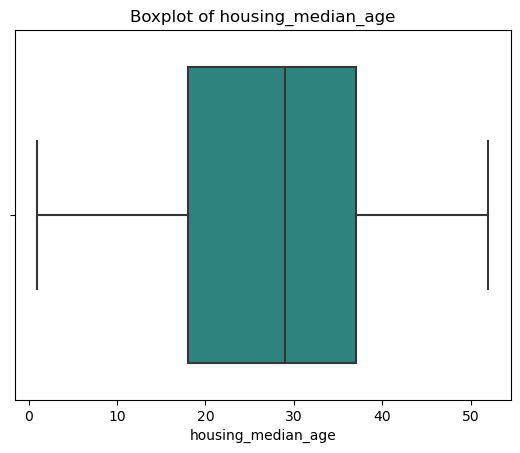

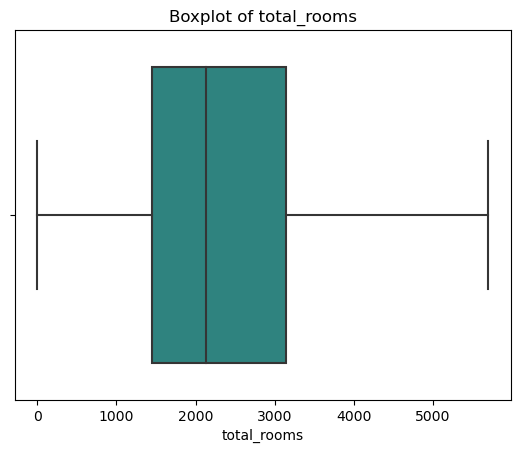

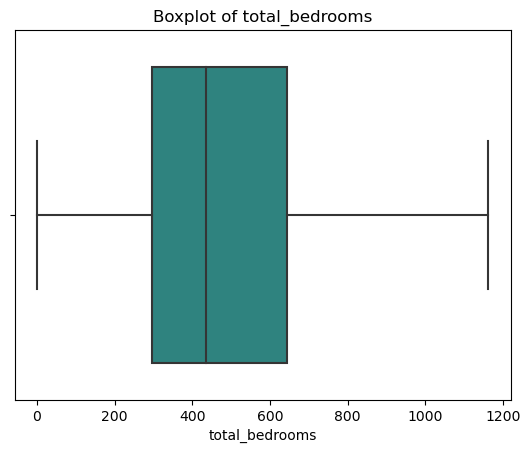

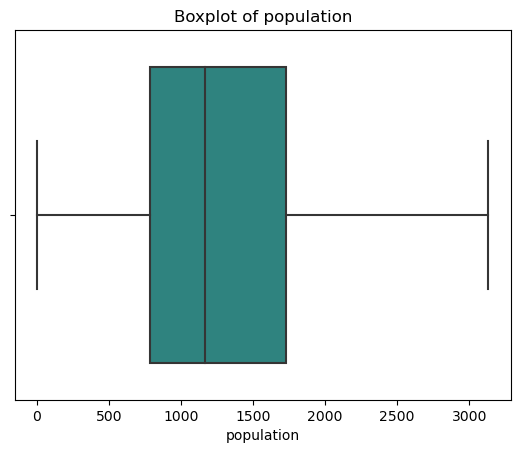

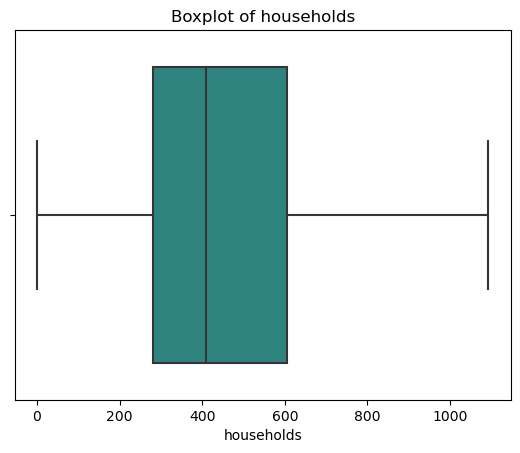

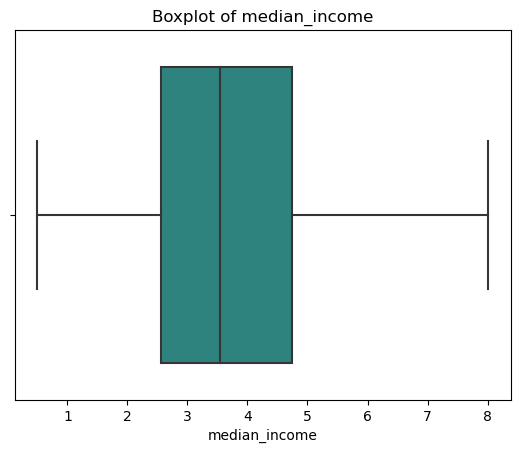

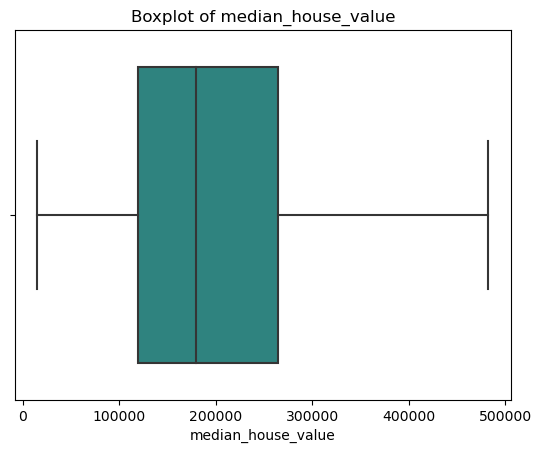

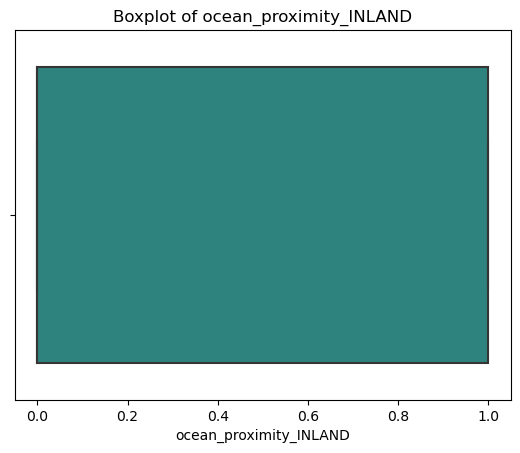

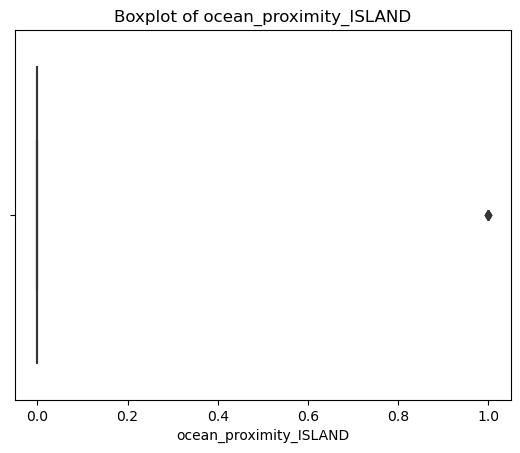

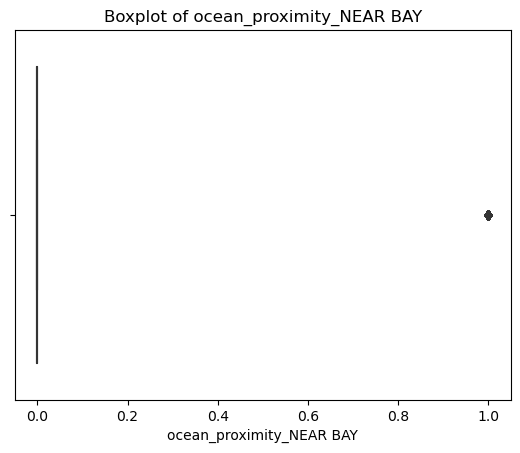

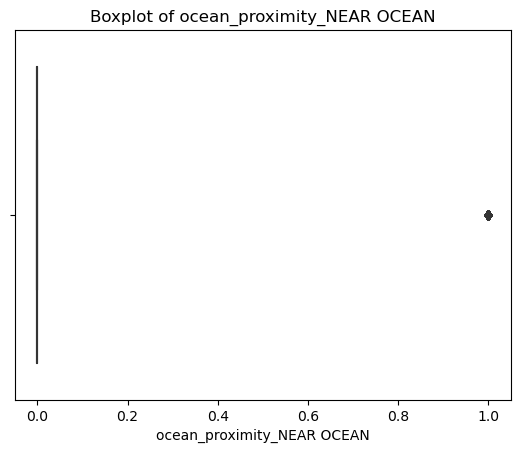

In [58]:
# checking once again
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure()
for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# 🧙🏾‍♂️ Let's weave some feature engineering magic!

In [59]:
# Creating a new feature 'rooms_per_household'
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [60]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0.0,0.0,1.0,0.0,6.984127
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0.0,0.0,1.0,0.0,5.215904
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0.0,0.0,1.0,0.0,8.288136
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0.0,0.0,1.0,0.0,5.817352
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0.0,0.0,1.0,0.0,6.281853


In [61]:
# Appling log transformation to 'median_income'
df['log_median_income'] = np.log1p(df['median_income'])

In [62]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,log_median_income
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0.0,0.0,1.0,0.0,6.984127,2.198671
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0.0,0.0,1.0,0.0,5.215904,2.198671
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0.0,0.0,1.0,0.0,8.288136,2.111110
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0.0,0.0,1.0,0.0,5.817352,1.893579
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0.0,0.0,1.0,0.0,6.281853,1.578195


In [63]:
# Bin 'median_income' into categories
income_bins = [0, 2, 4, 6, np.inf]
income_labels = ['low', 'moderate', 'high', 'very_high']
df['income_category'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels)

In [64]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,log_median_income,income_category
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0.0,0.0,1.0,0.0,6.984127,2.198671,very_high
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0.0,0.0,1.0,0.0,5.215904,2.198671,very_high
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0.0,0.0,1.0,0.0,8.288136,2.111110,very_high
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0.0,0.0,1.0,0.0,5.817352,1.893579,high
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0.0,0.0,1.0,0.0,6.281853,1.578195,moderate


In [65]:
# Create an interaction term for 'total_rooms' and 'population'
df['rooms_times_population'] = df['total_rooms'] * df['population']

In [66]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,log_median_income,income_category,rooms_times_population
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0.0,0.0,1.0,0.0,6.984127,2.198671,very_high,2.833600e+05
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0.0,0.0,1.0,0.0,5.215904,2.198671,very_high,1.368180e+07
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0.0,0.0,1.0,0.0,8.288136,2.111110,very_high,7.276320e+05
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0.0,0.0,1.0,0.0,5.817352,1.893579,high,7.108920e+05
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0.0,0.0,1.0,0.0,6.281853,1.578195,moderate,9.192550e+05


C:\Users\DHINA\AppData\Local\Temp\ipykernel_4584\1855105436.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income_category', y='median_house_value', data=df, ci=None, palette='viridis')


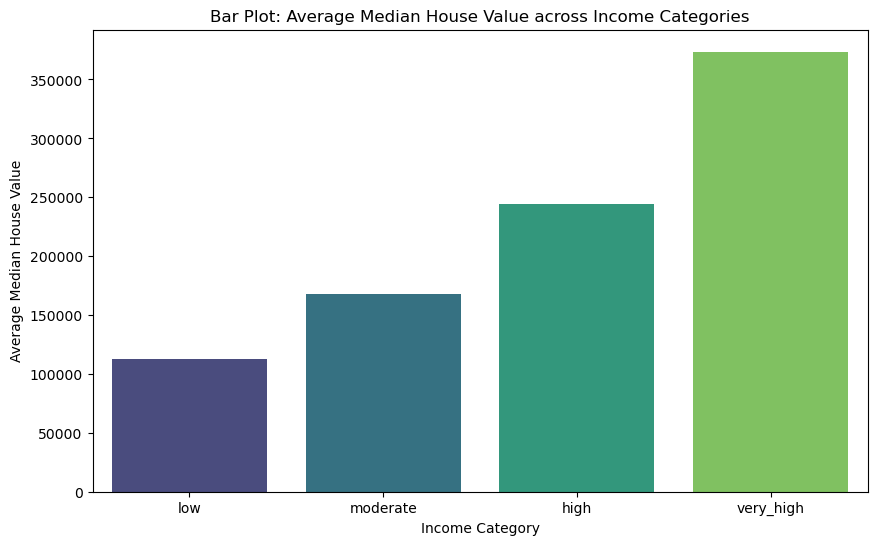

In [68]:
# Bar plot for average 'median_house_value' across 'income_category'
plt.figure(figsize=(10, 6))
sns.barplot(x='income_category', y='median_house_value', data=df, ci=None, palette='viridis')
plt.title('Bar Plot: Average Median House Value across Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Average Median House Value')
plt.show()


Insights:
    The bar plot reveals a clear positive relationship between income categories and median house values, with substantial differences observed: from around $50,000 in low-income areas to approximately $350,000 in very high-income areas.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract features and target variable
X = df.drop(['median_house_value', 'income_category'], axis=1)
y = df['median_house_value']

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_model = LinearRegression()


In [71]:
# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

In [72]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4469999881.81
R-squared: 0.65


MSE: The average squared difference between the actual and predicted values is approximately $4.47 billion. Lower MSE values indicate better model performance, so it's important to consider the scale of the target variable.

R-squared: The R-squared value of 0.65 indicates that the model explains about 65% of the variance in the target variable. A higher R-squared value suggests a better fit, but it's important to consider the specific context of your data.


## Conclusion:

In conclusion, this project successfully achieved its objectives of predicting median house values in California through a systematic data analysis pipeline. Key findings include:

- The developed linear regression model provides insights into the relationships between housing features and median house values.
- Predictions generated by the model demonstrate its practical application in estimating housing prices for different locations.